In [1]:
# ---------------------------------------------------------------
# Data Preprocessing & EDA
# ---------------------------------------------------------------

# 🔧 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

# ---------------------------------------------------------------
# 1️⃣ Load Dataset
# ---------------------------------------------------------------

df = pd.read_csv('../data/Telco-Customer-Churn.csv')
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# ---------------------------------------------------------------
# Basic Dataset Information
# ---------------------------------------------------------------
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


How many rows/columns?
Which columns are categorical vs numeric?
Ans.
We'll use `df.info()` and `df.describe()` to understand the data types and basic statistics

Any obvious missing or inconsistent data?
Ans.
We'll use df.isnull().sum()

In [3]:
# ---------------------------------------------------------------
#Check Missing Values
# ---------------------------------------------------------------
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# Convert 'TotalCharges' to numeric (it may contain blanks)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
print("After cleaning:", df.shape)


After cleaning: (7032, 21)


In [5]:
# ---------------------------------------------------------------
#Encode Target Variable
# ---------------------------------------------------------------
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].value_counts(normalize=True)


Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

Roughly ~26% churners and ~74% non-churners — dataset is slightly imbalanced

In [6]:
# ---------------------------------------------------------------
#Identify Categorical Columns
# ---------------------------------------------------------------
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", cat_cols)


Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [7]:
# One-Hot Encode Categorical Columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("New Shape after Encoding:", df_encoded.shape)


New Shape after Encoding: (7032, 7062)


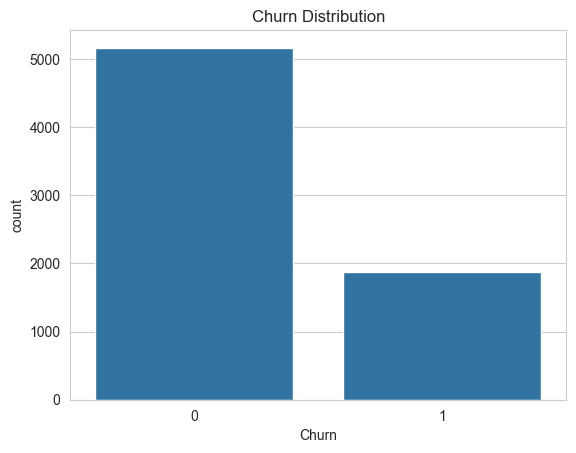

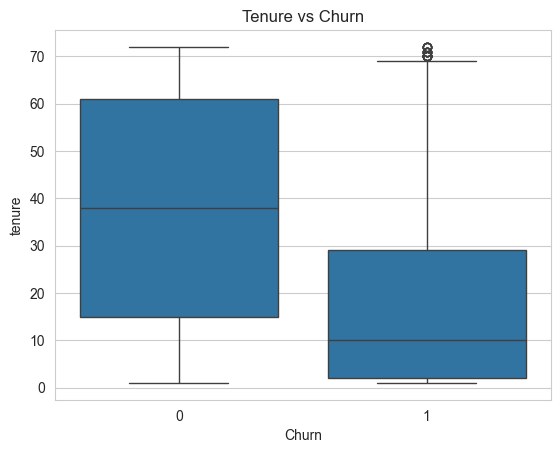

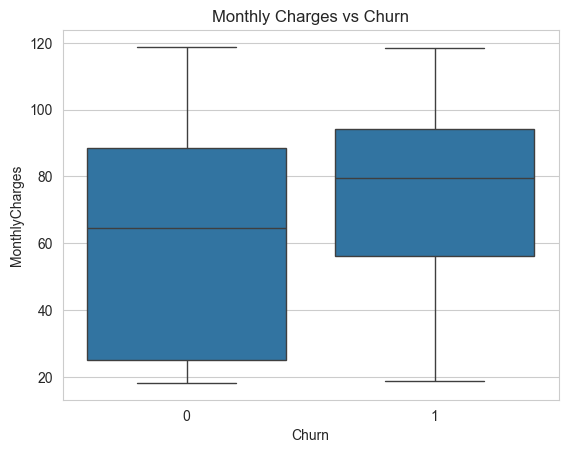

In [8]:
# ---------------------------------------------------------------
#Exploratory Data Analysis (EDA)
# ---------------------------------------------------------------

# 🔹 Target Distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# 🔹 Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

# 🔹 MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


Do churners have shorter tenures?
Ans.
We'll use 
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show() to check.
Do they pay higher or lower monthly charges?
Ans.
We'll analyze how monthly charges vary between churned and non-churned customers.
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


Top 10 features most correlated with churn:

InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
MonthlyCharges                    0.192858
PaperlessBilling_Yes              0.191454
SeniorCitizen                     0.150541
StreamingTV_Yes                   0.063254
StreamingMovies_Yes               0.060860
MultipleLines_Yes                 0.040033
customerID_0520-FDVVT             0.019822
customerID_4597-ELFTS             0.019822
dtype: float64


C:\Users\fff\AppData\Local\Temp\ipykernel_13296\891103087.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')


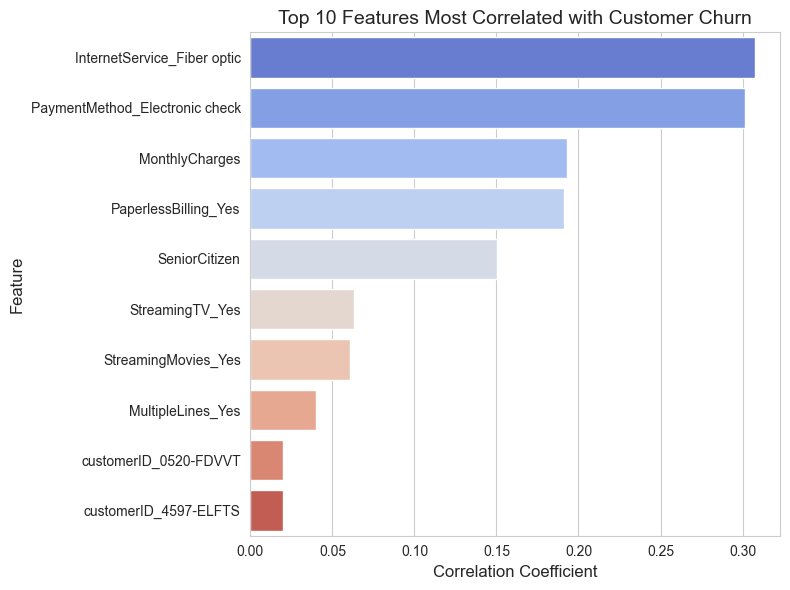

In [9]:
# ---------------------------------------------------------------
# Top 10 Features Most Correlated with Churn (Optimized)
# ---------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'Churn' exists
if 'Churn' not in df_encoded.columns:
    print("Error: 'Churn' column not found. Make sure df_encoded['Churn'] is defined.")
else:
    # Compute correlation with Churn column only (fast loop version)
    corrs = {}
    for col in df_encoded.columns:
        if col != 'Churn':
            corrs[col] = df_encoded[col].corr(df_encoded['Churn'])

    # Convert to pandas Series and sort by correlation strength
    corr_with_churn = pd.Series(corrs).sort_values(ascending=False)

    # Display top 10 correlated features
    print("Top 10 features most correlated with churn:\n")
    print(corr_with_churn.head(10))

    # Plot Top 10 Correlations
    plt.figure(figsize=(8,6))
    top_corr = corr_with_churn.head(10)
    sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
    plt.title('Top 10 Features Most Correlated with Customer Churn', fontsize=14)
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()


In [10]:
corr_with_churn.to_csv('../data/feature_correlations.csv', header=['Correlation'])
print("✅ Saved correlations to '../data/feature_correlations.csv'")


✅ Saved correlations to '../data/feature_correlations.csv'


In [11]:
# ---------------------------------------------------------------
#Save Cleaned Dataset
# ---------------------------------------------------------------
df_encoded.to_csv('../data/cleaned_churn_data.csv', index=False)
print("✅ Cleaned dataset saved successfully!")


✅ Cleaned dataset saved successfully!
